출처

https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import numpy as np

array = [[1, 2, 3], [4, 5, 6]]
first_array = np.array(array) # 그냥 list를 np array로
print("Array Type: {}".format(type(first_array)))
print("Array Shape: {}".format(np.shape(first_array)))
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [4]:
import torch

tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type))
print("Array Shape: {}".format(tensor.shape))
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7eff4270a828>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [5]:
print("Numpy {}\n".format(np.ones((2,3))))
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
print("Numpy {}\n".format(np.random.rand(2,3)))
print(torch.rand(2,3))

Numpy [[0.68460248 0.93394732 0.67002689]
 [0.17558687 0.11493495 0.26229389]]

tensor([[0.1830, 0.1933, 0.1630],
        [0.9939, 0.0740, 0.1424]])


In [7]:
array = np.random.rand(2,2)
print("{} {}\n".format(type(array), array))

# numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# tensor to numpy
tensor = from_numpy_to_tensor
from_numpy_to_tensor = tensor.numpy()
print("{} {}\n".format(type(from_numpy_to_tensor), from_numpy_to_tensor))

<class 'numpy.ndarray'> [[0.30861243 0.71629236]
 [0.94105357 0.66520913]]

tensor([[0.3086, 0.7163],
        [0.9411, 0.6652]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.30861243 0.71629236]
 [0.94105357 0.66520913]]



### Basic Math with Pytorch
- Resize: view()
- a and b are tensor.
- Addition: torch.add(a,b) = a + b
- Subtraction: a.sub(b) = a - b
- Element wise multiplication: torch.mul(a,b) = a * b
- Element wise division: torch.div(a,b) = a / b
- Mean: a.mean()
- Standart Deviation (std): a.std()

In [8]:
tensor = torch.ones(3, 3)
print("\n", tensor)

print("{}{}\n".format(tensor.view(9).shape, tensor.view(9)))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])



In [9]:
torch.add(tensor, tensor)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [10]:
tensor.sub(tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [11]:
torch.mul(tensor, tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [12]:
torch.div(tensor, tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [13]:
tensor.mean()

tensor(1.)

In [14]:
tensor.std()

tensor(0.)

### Variables
- It accumulates gradients.
- Difference between variables and tensor is variable accumulates gradients.
- We can make math operations with variables, too.

패키지의 중심에는 autograd.Variable 클래스가 있습니다. 

이는 Tensor를 감싸고(wrap) 있으며, Tensor 기반으로 정의된 거의 대부분의 연산을 지원합니다. 

계산이 완료된 후 .backward() 를 호출하여 모든 변화도(gradient)을 자동으로 계산할 수 있습니다.

.data 속성을 사용하여 tensor 자체(raw tensor)에 접근할 수 있으며, 이 변수와 관련된 변화도는 .grad 에 누적됩니다.

In [15]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad = True) # Variable 선언 방법

In [16]:
var

tensor([1., 1., 1.], requires_grad=True)

In [17]:
array = [2, 4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y = ", y)

 y =  tensor([ 4., 16.], grad_fn=<PowBackward0>)


In [18]:
# ??????????????????
o = (1/2)*sum(y)
print(" o = ", o)

 o =  tensor(10., grad_fn=<MulBackward0>)


In [19]:
o.backward()

In [21]:
print("gradient: ", x.grad)

gradient:  tensor([2., 4.])


### Linear Regression

In [23]:
car_prices_array = [3, 4, 5, 6, 7, 8, 9]
car_price_np = np.array(car_prices_array, dtype = np.float32)
car_price_np = car_price_np.reshape(-1, 1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

In [24]:
car_price_np

array([[3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]], dtype=float32)

In [25]:
car_price_tensor

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [27]:
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype = np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1, 1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

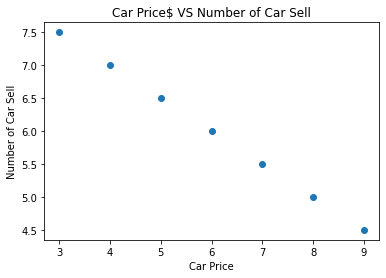

In [29]:
import matplotlib.pyplot as plt

plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel("Car Price")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

###Steps of Linear Regression
create LinearRegression class
- define model from this LinearRegression class
- MSE: Mean squared error
- Optimization (SGD:stochastic gradient descent)
- Backpropagation
- Prediction


In [30]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

In [31]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    # nn.Module 상속
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)

# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

In [32]:
#MSE
mse = nn.MSELoss()

In [33]:
#Optimization
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epoch 0, loss 7.7200927734375
epoch 50, loss 5.211495876312256
epoch 100, loss 3.5216257572174072
epoch 150, loss 2.3797097206115723
epoch 200, loss 1.6080691814422607
epoch 250, loss 1.086639165878296
epoch 300, loss 0.7342871427536011
epoch 350, loss 0.4961886703968048
epoch 400, loss 0.33529525995254517
epoch 450, loss 0.22657307982444763
epoch 500, loss 0.15310494601726532
epoch 550, loss 0.10345952212810516
epoch 600, loss 0.06991221755743027
epoch 650, loss 0.047242920845746994
epoch 700, loss 0.031924109905958176
epoch 750, loss 0.02157251536846161
epoch 800, loss 0.014577516354620457
epoch 850, loss 0.00985054112970829
epoch 900, loss 0.006656400393694639
epoch 950, loss 0.00449784193187952
epoch 1000, loss 0.003039457369595766


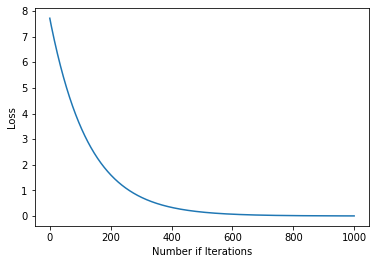

In [35]:
#train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
  optimizer.zero_grad() #가중치 갱신 후에는 수동으로 변화도를 0으로
  results = model(car_price_tensor)
  loss = mse(results, number_of_car_sell_tensor)
  loss.backward()
  optimizer.step()  #optimizer의 step 함수를 호출하면 매개변수가 갱신
  loss_list.append(loss.data)

  if(iteration % 50 == 0):
    print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number if Iterations")
plt.ylabel("Loss")
plt.show()

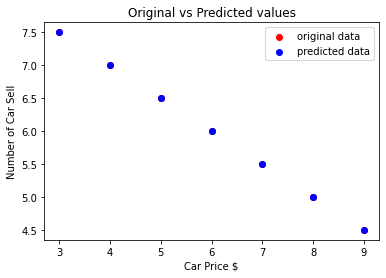

In [38]:
#차 가격 예측 가능
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label = "original data", color = "red")
plt.scatter(car_prices_array, number_of_car_sell_array, label = "predicted data", color = "blue")

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

### Logistic Regression
- for Classification

In [40]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [45]:
train = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/PytorchTutorialForDL/input/train.csv", dtype = np.float32)
#pixel(feature)과 labels 나누기
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != "label"].values/255 #normalization
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                              targets_numpy,
                                                                              test_size = 0.2,
                                                                              random_state = 42)

In [42]:
targets_numpy

array([1., 0., 1., ..., 7., 6., 9.], dtype=float32)

In [43]:
features_numpy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) #데이터타입 long으로

In [48]:
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) #데이터타입 long으로

In [49]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train)/batch_size)
num_epochs = int(num_epochs)

In [53]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

In [54]:
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


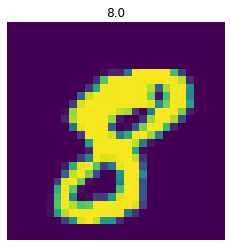

In [55]:
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png') #그래프 사진으로 저장
plt.show()

In [57]:
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

In [59]:
# 인스턴스화 (추상적 -> 구체적) ????????????????????????????????
input_dim = 28 * 28  # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

In [60]:
model = LogisticRegressionModel(input_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [64]:
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model(train)
    loss = error(outputs, labels)
    loss.backward()
    optimizer.step()

    count += 1
  #Prediction
    if count % 50 == 0:
      #cal accuracy
      correct = 0
      total = 0
      #predict test dataset
      for images, labels in test_loader:
        test = Variable(images.view(-1, 28*28))
        outputs = model(test)
        predicted = torch.max(outputs.data, 1)[1]
        #print("predicted: ", predicted)
        total += len(labels)
        correct += (predicted == labels).sum()
      accuracy = 100 * correct / float(total)

      loss_list.append(loss.data)
      iteration_list.append(count)
    if count % 500 == 0:
      print('Iteration: {} Loss: {} Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.5544712543487549 Accuracy: 86.19047546386719%
Iteration: 1000 Loss: 0.643292248249054 Accuracy: 86.25%
Iteration: 1500 Loss: 0.47578132152557373 Accuracy: 86.30952453613281%
Iteration: 2000 Loss: 0.5798879861831665 Accuracy: 86.45237731933594%
Iteration: 2500 Loss: 0.5244973301887512 Accuracy: 86.63095092773438%
Iteration: 3000 Loss: 0.3947732150554657 Accuracy: 86.71428680419922%
Iteration: 3500 Loss: 0.5284656882286072 Accuracy: 86.82142639160156%
Iteration: 4000 Loss: 0.3754587471485138 Accuracy: 86.97618865966797%
Iteration: 4500 Loss: 0.6914910078048706 Accuracy: 87.05952453613281%
Iteration: 5000 Loss: 0.5229037404060364 Accuracy: 87.14286041259766%
Iteration: 5500 Loss: 0.5018782615661621 Accuracy: 87.22618865966797%
Iteration: 6000 Loss: 0.6369530558586121 Accuracy: 87.30952453613281%
Iteration: 6500 Loss: 0.44178858399391174 Accuracy: 87.33333587646484%
Iteration: 7000 Loss: 0.5128962993621826 Accuracy: 87.38095092773438%
Iteration: 7500 Loss: 0.45150461

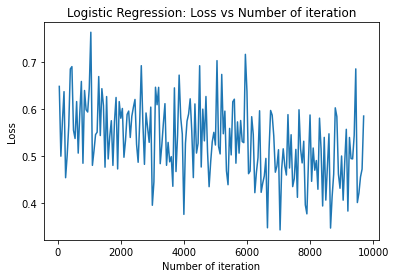

In [65]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

### Artificail Neural Network (ANN)
- Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.
- Therefore, we need to increase complexity of model.
- In order to increase complexity of model, we need to add more non linear functions as hidden layer.
- 이전 데이터셋 사용
- Create ANN Model
  - We add 3 hidden layers.
  - We use ReLU, Tanh and ELU activation functions for diversity.

In [67]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [68]:
class ANNModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(ANNModel, self).__init__()

    #784 -> 150
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.relu1 = nn.ReLU()

    #150 -> 150
    self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    self.tanh2 = nn.Tanh()

    #150 -> 150
    self.fc3 = nn.Linear(hidden_dim, hidden_dim)
    self.elu3 = nn.ELU() # Leaky ReLU랑 비슷하게 생김

    self.fc4 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu1(out)

    out = self.fc2(out)
    out = self.tanh2(out)

    out = self.fc3(out)
    out = self.elu3(out)

    out = self.fc4(out)
    return out

input_dim = 28*28
hidden_dim = 150
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [71]:
#training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model(train)
    loss = error(outputs, labels)
    loss.backward()
    optimizer.step()

    count += 1

    if count % 50 == 0:
      correct = 0
      total = 0

      for images, labels in test_loader:
        test = Variable(images.view(-1, 28*28))
        outputs = model(test)
        predicted = torch.max(outputs.data, 1)[1]
        total += len(labels)
        correct += (predicted == labels).sum()

      accuracy = 100 * correct / float(total)

      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    if count % 500 == 0:
      print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7529537081718445  Accuracy: 78.8452377319336 %
Iteration: 1000  Loss: 0.4458160698413849  Accuracy: 87.45237731933594 %
Iteration: 1500  Loss: 0.22009523212909698  Accuracy: 89.64286041259766 %
Iteration: 2000  Loss: 0.2947472333908081  Accuracy: 90.61904907226562 %
Iteration: 2500  Loss: 0.3044738471508026  Accuracy: 91.70237731933594 %
Iteration: 3000  Loss: 0.12027457356452942  Accuracy: 92.73809814453125 %
Iteration: 3500  Loss: 0.24463897943496704  Accuracy: 93.21428680419922 %
Iteration: 4000  Loss: 0.06646094471216202  Accuracy: 93.78571319580078 %
Iteration: 4500  Loss: 0.3297683000564575  Accuracy: 94.10713958740234 %
Iteration: 5000  Loss: 0.10319007933139801  Accuracy: 94.5952377319336 %
Iteration: 5500  Loss: 0.19485513865947723  Accuracy: 94.5952377319336 %
Iteration: 6000  Loss: 0.18210311233997345  Accuracy: 95.08333587646484 %
Iteration: 6500  Loss: 0.0934469997882843  Accuracy: 95.36904907226562 %
Iteration: 7000  Loss: 0.11912927776575089  Accu

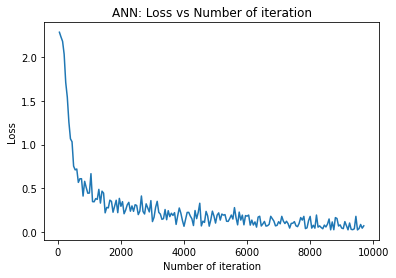

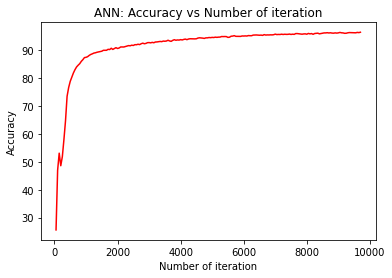

In [72]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

### Convolutional Neural Network (CNN)

- Convolutional layer:
  - Create feature maps with filters(kernels).
  - Padding: After applying filter, dimensions of original image decreases. 
  However, we want to preserve as much as information about the original image. We can apply padding to increase dimension of feature map after convolutional layer.
  - We use 2 convolutional layer.
  - Number of feature map is out_channels = 16
  - Filter(kernel) size is 5*5

In [73]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [74]:
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()

    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
    self.relu1 = nn.ReLU()

    self.maxpool1 = nn.MaxPool2d(kernel_size=2)

    self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
    self.relu2 = nn.ReLU()

    self.maxpool2 = nn.MaxPool2d(kernel_size=2)

    self.fc1 = nn.Linear(32 * 4 * 4, 10) #저렇게 아웃풋 나옴

  def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        
        out = self.maxpool1(out)
        
        out = self.cnn2(out)
        out = self.relu2(out)
        
        out = self.maxpool2(out)
        
        out = out.view(out.size(0), -1)

        out = self.fc1(out)
        
        return out

batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

model = CNNModel()

error = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [77]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
      train = Variable(images.view(100,1,28,28)) #100개 이미지, 28 x 28 그레이 스케일
      labels = Variable(labels)

      optimizer.zero_grad()
      outputs = model(train)
      loss = error(outputs, labels)
      loss.backward()
      optimizer.step()
      count += 1

      if count % 50 == 0:      
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(100,1,28,28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
      if count % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.02908036857843399  Accuracy: 98.38095092773438 %
Iteration: 1000  Loss: 0.03802637755870819  Accuracy: 98.46428680419922 %
Iteration: 1500  Loss: 0.016574084758758545  Accuracy: 98.52381134033203 %
Iteration: 2000  Loss: 0.012830104678869247  Accuracy: 98.60713958740234 %


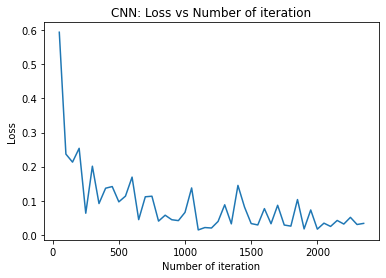

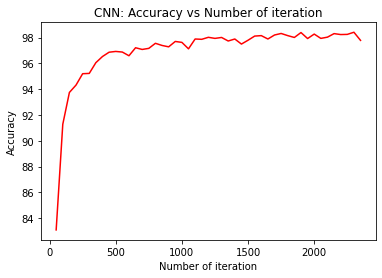

In [76]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()